# Trabalho 3

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_excel("../data/T3_XR.xlsx")
dfMedidas = df.drop(["Amostra"], axis = 1) # Retira a coluna Amostra, criando assim um dataframe com apenas as medidas.
display(dfMedidas)

,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,Medida_6,Medida_7,Medida_8,Medida_9
0,56.712,64.912,56.322,55.076,61.379,61.022,63.284,55.824,56.251
1,58.374,51.903,60.750,62.590,53.886,58.542,59.874,61.459,58.915
2,59.509,64.091,58.589,59.256,60.566,59.074,55.842,54.994,58.386
3,58.913,65.106,64.662,55.185,58.302,63.130,56.437,60.623,60.667
4,56.831,60.079,59.730,56.881,53.053,63.189,60.983,61.698,63.604
5,58.155,56.468,56.481,61.086,58.750,59.447,59.721,61.991,59.027
6,60.393,61.526,58.146,61.635,59.926,58.937,56.873,58.271,60.611
7,62.197,59.725,56.892,56.367,64.973,60.150,53.792,62.481,63.598
8,57.493,58.104,58.489,63.887,61.278,65.949,60.119,56.032,58.167
9,59.744,57.103,55.752,63.120,60.976,63.739,58.233,58.213,58.163


Ajeitando a tabela de parâmetros

In [ ]:
parametros = pd.read_excel("TEP00120 - TABELAS.xlsx", header = None) #Importa o arquivo sem o cabeçalho.
parametros = parametros.drop([0,1], axis = 0) #Retira as duas primeiras linhas da tabela de valores.
parametros.columns = parametros.iloc[0].values #Substitui o cabeçalho da planilha pelos valores da primeira linha.
parametros = parametros.drop([2], axis = 0) #Retira a primeira linha.
parametros.index = range(len(parametros)) #Conserta os índices das linhas da tabela.
display(parametros) #Exibe o dataframe da tabela de valores.

,n,A,A2,A3,c4,1/c4,B3,B4,B5,B6,d2,1/d2,d3,D1,D2,D3,D4
0,2,2.121,1.88,2.659,0.7979,1.2533,0,3.267,0,2.606,1.128,0.8865,0.853,0,3.686,0,3.267
1,3,1.732,1.023,1.954,0.8862,1.1284,0,2.568,0,2.276,1.693,0.5907,0.888,0,4.358,0,2.574
2,4,1.5,0.729,1.628,0.9213,1.0854,0,2.266,0,2.088,2.059,0.4857,0.88,0,4.698,0,2.282
3,5,1.342,0.577,1.427,0.94,1.0638,0,2.089,0,1.964,2.326,0.4299,0.864,0,4.918,0,2.114
4,6,1.225,0.483,1.287,0.9515,1.051,0.03,1.97,0.029,1.874,2.534,0.3946,0.848,0,5.078,0,2.004
5,7,1.134,0.419,1.182,0.9594,1.0423,0.118,1.882,0.113,1.806,2.704,0.3698,0.833,0.204,5.204,0.076,1.924
6,8,1.061,0.373,1.099,0.965,1.0363,0.185,1.815,0.179,1.751,2.847,0.3512,0.82,0.388,5.306,0.136,1.864
7,9,1,0.337,1.032,0.9693,1.0317,0.239,1.761,0.232,1.707,2.97,0.3367,0.808,0.547,5.393,0.184,1.816
8,10,0.949,0.308,0.975,0.9727,1.0281,0.284,1.716,0.276,1.669,3.078,0.3249,0.797,0.687,5.469,0.223,1.777
9,11,0.905,0.285,0.927,0.9754,1.0252,0.321,1.679,0.313,1.637,3.173,0.3152,0.787,0.811,5.535,0.256,1.744


Importando e ajeitando a tabela de distribuição W

In [ ]:
W = pd.read_excel("TEP00120 - TABELAS.xlsx", sheet_name = "Distribuição W") #Ler a planilha Distribuição W do arquivo excel.
W.columns = W.iloc[0].astype(str) #Substitui o cabeçalho da planilha pelos valores da primeira linha.
W = W.drop([0], axis = 0) #Retira a primeira linha.
W.index = range(len(W)) #Conserta os índices das linhas do dataframe W.
for j in range(1, len(W.columns)): #Preenche as células vazias com valores 0 ou 1.
  valor = float(0)
  for i in range(len(W)):
    if pd.isna(W.iloc[i, j]):
      W.iloc[i, j] = valor
    else:
      valor = 1
display(W)

,W0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,0.05,0.0282,0.0007,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
1,0.1,0.0564,0.0028,0.0001,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
2,0.15,0.0845,0.0062,0.0004,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
3,0.2,0.1125,0.0110,0.0010,0.0001,0.0,0.0000,0.0000,0.0000,0.0000
4,0.25,0.1403,0.0171,0.0020,0.0002,0.0,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
132,6.65,1.0000,1.0000,1.0000,1.0000,1.0,0.9999,0.9999,0.9999,0.9999
133,6.7,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,0.9999,0.9999,0.9999
134,6.75,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,0.9999,0.9999
135,6.8,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,0.9999,0.9999


Definindo algumas funções úteis

In [ ]:
#DEFININDO ALGUMAS FUNÇÕES ÚTEIS:

def parametro(p, n):
  '''Definindo uma função para buscar o parâmetro desejado.'''
  p = str(p) #É o parâmetro que desejamos encontrar.
  n = abs(int(n)) #É o tamanho de cada amostra.
  if n > len(parametros): #Suite para obter os valores da tabela.
    return parametros.loc[parametros.loc[len(parametros) - 1, "n"], p]
  elif n >= 2:
    return parametros.loc[n - 2, p]
  else:
    return 0

def probW(W0, n): #Retorna a probablidade acumulada de P(W < W0).
  n = int(n) #Tamanho das amostras.
  W0 = float(W0)
  valoresW0 = list(W["W0"])
  if n >= 1 and n <= 11:
    ProbN = list(W[W.columns[n - 1]]) #Define a lista de probabilidades para amostra de tamnho N.
  for i in range(len(valoresW0)): #Foi utilizado uma interpolação linear no caso de W0 se situa entre dois valores da tabela.
    if W0 == valoresW0[i]:
      return ProbN[i]
    elif W0 > valoresW0[i] and W0 < valoresW0[i + 1]:
      if valoresW0[i] == valoresW0[i + 1]:
        m = 0 #Coeficiente Angular definido como 0.
      else:
        m = (ProbN[i + 1] -ProbN[i])/(valoresW0[i + 1]-valoresW0[i]) #Calculando o Coeficiente Angular.
      return m*(W0 - valoresW0[i]) + ProbN[i]

Calculando os parâmetros para criar o gráfico de R

In [ ]:
df["R"] = dfMedidas.max(axis = 1) - dfMedidas.min(axis = 1) #Cria a coluna R com as amplitudes.
D3 = parametro("D3", len(df.columns)) #Obtendo o parâmetro D3.
D4 = parametro("D4", len(df.columns)) #Obtendo o parâmetro D4.
LM_R = df["R"].mean() #Calculando a Linha Média de R.
LIC_R = LM_R * D3 #Calculando a Linha Inferior de Controle de R.
LSC_R = LM_R * D4 #Calculando a Linha Superior de Controle de R.

Verifica se o $R$ de cada amostra se encontra dentro dos limites superior e inferior calculados anteriormente. Caso contrário, essa amostra será descartada e os limites e a média para $R$ serão recalculados.

In [ ]:
i = 0
while i < len(df):
  if df.loc[i,"R"] < LIC_R or df.loc[i,"R"] > LSC_R: #Verifica se o R de uma amostra foge dos limites.
    df = df.drop([i], axis=0) #Deleta a linha.
    df.index = range(len(df)) #Atualiza os indices.
    LM_R = df["R"].mean() #Recalculando a Linha Média de R.
    LIC_R = LM_R * D3 #Recalculando a Linha Inferior de Controle de R.
    LSC_R = LM_R * D4 #Recalculando a Linha Superior de Controle de R.
  i = i + 1
display(df) # É possível ver que a amostra 23 foi descartada.

,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,Medida_6,Medida_7,Medida_8,Medida_9,R
0,1,56.712,64.912,56.322,55.076,61.379,61.022,63.284,55.824,56.251,9.836
1,2,58.374,51.903,60.750,62.590,53.886,58.542,59.874,61.459,58.915,10.687
2,3,59.509,64.091,58.589,59.256,60.566,59.074,55.842,54.994,58.386,9.097
3,4,58.913,65.106,64.662,55.185,58.302,63.130,56.437,60.623,60.667,9.921
4,5,56.831,60.079,59.730,56.881,53.053,63.189,60.983,61.698,63.604,10.551
5,6,58.155,56.468,56.481,61.086,58.750,59.447,59.721,61.991,59.027,5.523
6,7,60.393,61.526,58.146,61.635,59.926,58.937,56.873,58.271,60.611,4.762
7,8,62.197,59.725,56.892,56.367,64.973,60.150,53.792,62.481,63.598,11.181
8,9,57.493,58.104,58.489,63.887,61.278,65.949,60.119,56.032,58.167,9.917
9,10,59.744,57.103,55.752,63.120,60.976,63.739,58.233,58.213,58.163,7.987


Desenhando o gráfico de $R$

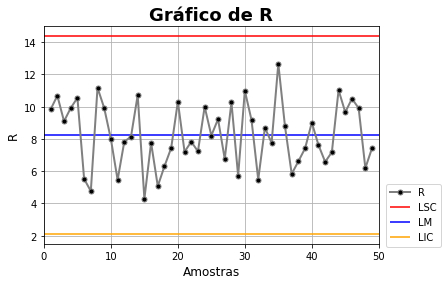

In [ ]:
plt.plot(range(1, len(df) + 1),  df["R"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5) 
plt.hlines(LSC_R, xmin = 0, xmax = len(df) + 1, colors = "red") # Adiciona a Linha Superior de Controle de R.
plt.hlines(LM_R, xmin = 0, xmax = len(df) + 1, colors = "blue") # Adiciona a linha Linha Média de R.
plt.hlines(LIC_R, xmin = 0, xmax = len(df) + 1, colors = "orange") # Adiciona a Linha Inferior de Controle de R.
plt.legend(['R', 'LSC', 'LM', 'LIC'], loc = 'best', bbox_to_anchor=(1.2, 0.3))
plt.grid(True)
plt.title( # Adiciona o título com a formatação.
    "Gráfico de R",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
) 
plt.xlabel( # Adiciona um título para o eixo horizontal.
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = 0, right = len(df) + 1) # Define o intervalo de exibição do eixo horizontal.
plt.ylabel( # Adiciona o título para o eixo vertical.
    "R",
    fontdict = {
        'family':'raleway',
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.show()
plt.savefig('Gráfico_R.png', format = 'png', dpi = 300, bbox_inches = 'tight') # Salva o gráfico em formato png.

Calculando os parâmetros necessários para criar o gráfico de $\overline{X}$

In [ ]:
df["Xbarra"] = dfMedidas.mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
A2 = parametro("A2", len(df.columns)) #Obtendo o parâmetro A2.
LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
LIC_Xbarra = LM_Xbarra - LM_R * A2 #Calculando a Linha Inferior de Controle de Xbarra.
LSC_Xbarra = LM_Xbarra + LM_R * A2 #Calculando a Linha Superior de Controle de Xbarra.

Verifica se o $\overline{X}$ de cada amostra se encontra dentro dos limites superior e inferior calculados anteriormente. Caso contrário, essa amostra será descartada e os limites e a média para $\overline{X}$ serão recalculados.

In [ ]:
i = 0
while i < len(df):
  if df.loc[i,"Xbarra"] < LIC_Xbarra or df.loc[i,"Xbarra"] > LSC_Xbarra: #Verifica se Xbarra de uma amostra foge dos limites.
    df = df.drop([i], axis = 0) #Deleta a linha.
    df.index = range(len(df)) #Atualiza os indices.
    LM_Xbarra = df["Xbarra"].mean() #Recalculando a Linha Média de Xbarra.
    LM_R = df["R"].mean() #Calculando a média de R.
    LIC_Xbarra = LM_Xbarra - LM_R * A2 #Recalculando a Linha Inferior de Controle de Xbarra.
    LSC_Xbarra = LM_Xbarra + LM_R * A2 #Recalculando a Linha Superior de Controle de Xbarra.
  i = i + 1
display(df) #É possível ver que nenhuma amostra foi descartada.

,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,Medida_6,Medida_7,Medida_8,Medida_9,R,Xbarra
0,1,56.712,64.912,56.322,55.076,61.379,61.022,63.284,55.824,56.251,9.836,58.975778
1,2,58.374,51.903,60.750,62.590,53.886,58.542,59.874,61.459,58.915,10.687,58.477000
2,3,59.509,64.091,58.589,59.256,60.566,59.074,55.842,54.994,58.386,9.097,58.923000
3,4,58.913,65.106,64.662,55.185,58.302,63.130,56.437,60.623,60.667,9.921,60.336111
4,5,56.831,60.079,59.730,56.881,53.053,63.189,60.983,61.698,63.604,10.551,59.560889
5,6,58.155,56.468,56.481,61.086,58.750,59.447,59.721,61.991,59.027,5.523,59.014000
6,7,60.393,61.526,58.146,61.635,59.926,58.937,56.873,58.271,60.611,4.762,59.590889
7,8,62.197,59.725,56.892,56.367,64.973,60.150,53.792,62.481,63.598,11.181,60.019444
8,9,57.493,58.104,58.489,63.887,61.278,65.949,60.119,56.032,58.167,9.917,59.946444
9,10,59.744,57.103,55.752,63.120,60.976,63.739,58.233,58.213,58.163,7.987,59.449222


Construindo o gráfico de $\overline{X}$

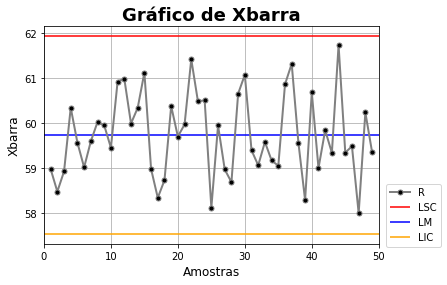

In [ ]:
plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") # Adiciona a Linha Superior de Controle de R.
plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") # Adiciona a linha Linha Média de R.
plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") # Adiciona a Linha Inferior de Controle de R.
plt.legend(['R', 'LSC', 'LM', 'LIC'], loc = 'best', bbox_to_anchor=(1.2, 0.3))
plt.grid(True)
plt.title( # Adiciona o título com a formatação.
    "Gráfico de Xbarra",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel( # Adiciona um título para o eixo horizontal.
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel( # Adiciona o título para o eixo vertical.
    "Xbarra",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.show #Exibe o gráfico.
plt.savefig('Gráfico_Xbarra.png', format='png', dpi = 300, bbox_inches='tight') #Salva o gráfico em formato png.

# Questão (d)

In [ ]:
def desempenhoR(n, H0, Erro, lamb = 1): #Definindo uma função para calcular o desempenho do gráfico de R.
  n = abs(int(n)) #Tamanho de cada amostra.
  lamb = abs(float(lamb)) #Parâmetro lambda.
  H0 = bool(H0) #Armazena o valor lógico da hipótese H0: sigma = sigma0
  Erro = bool(Erro) #Armazena o valor lógico da ocorrência de erro ou não.
  d2 = parametro("d2", n) #Obtendo o parâmetro d2.
  d3 = parametro("d3", n) #Obtendo o parâmetro d3.
  if H0 == True: #Caso a hipótese nula seja verdadeira, então...
    alpha = 1 - probW((d2 + 3 * d3), n) + probW(max(0, (d2 - 3 * d3)), n)
    if Erro == True: #Ou seja, se o erro do tipo I for verdadeiro.
      return alpha
    else:
      return 1 - alpha
  else: #Caso a hipótese nula seja falsa, ou seja, H1: sigma <> sigma0 é verdadeira, então...
    beta = probW((d2 + 3 * d3)/lamb, n) - probW(max(0, (d2-3*d3))/lamb, n)
    if Erro == True: #Ou seja, se o erro do tipo II for verdadeiro.
      return beta
    else:
      return 1 - beta #Que corresponde ao poder de detecção do gráfico de R.

# ITEM (d.1): O número médio de amostras até a ocorrência de um alarme verdadeiro será dado por:
PdR = desempenhoR(n = 9, H0 = False, Erro = False, lamb = 1.2) #Poder do gráfico de R.
print(1/PdR) #25.2206809583859
#Ou seja, uma média de 26 amostras até ser detectado o descontrole da dispersão.

# ITEM (d.2): O número médio de amostras até a ocorrência de um alarme falso será dado por:
alpha = desempenhoR(n = 9, H0 = True, Erro = True) #Poder do gráfico de R.
print(1/alpha) #228.72827081427621
#Ou seja, uma média de 229 amostras até se cometer o erro do tipo I.

25.2206809583859
228.72827081427621


# Questão (e)

In [ ]:
def desempenhoXbarra(n, H0, Erro, delt=0, k=3): # Definindo uma função para calcular o desempenho do gráfico de Xbarra.
  n = abs(int(n)) #Tamanho de cada amostra.
  k = abs(float(k)) #Quantidade de desvios padrões considerados para distanciar LSC_X e LIC_X da média LM_X.
                    #O valor de k geralmente adotado é de 3 desvios padrões.
  delt = abs(float(delt)) #Parâmetro lambda.
  H0 = bool(H0) #Armazena o valor lógico da hipótese H0: mu = mu0
  Erro = bool(Erro) #Armazena o valor lógico da ocorrência de erro ou não.
  if H0 == True: #Caso a hipótese nula seja verdadeira, então...
    alpha = 1 - norm.cdf(k) + norm.cdf(-k)
    if Erro == True: #Ou seja, se o erro do tipo I for verdadeiro.
      return alpha
    else:
      return 1 - alpha
  else: #Caso a hipótese nula seja falsa, ou seja, H1: mu <> mu0 é verdadeira, então...
    beta = norm.cdf(k - delt*(n**0.5)) - norm.cdf(-k - delt*(n**0.5))
    if Erro == True: #Ou seja, se o erro do tipo II for verdadeiro.
      return beta
    else:
      return 1 - beta #Que corresponde ao poder de detecção do gráfico de Xbarra.

3.6462662182607244
370.3983473449578


ITEM (e.1): O número médio de amostras até a ocorrência de um alarme verdadeiro será dado por

In [ ]:
PdXbarra = desempenhoXbarra(n = 9, H0 = False, Erro = False, delt = 0.8) #Poder do gráfico de Xbarra.
print(1/PdXbarra) #3.6462662182607244 ...

Ou seja, uma média de 4 amostras até ser detectado o descontrole da média.

ITEM (e.2): O número médio de amostras até a ocorrência de um alarme falso será dado por

In [ ]:
alpha = desempenhoXbarra(n = 9, H0 = True, Erro = True) # Poder do gráfico de R.
print(1/alpha) #370.3983473449578...

Ou seja, uma média de 371 amostras até ser cometetido o erro do tipo I.